In [5]:
from NeuralNetwork import Perceptron, ANN


1.8274068835842532e-07
0.005045872565861189
0.0050490431050652694
0.9929494684718666


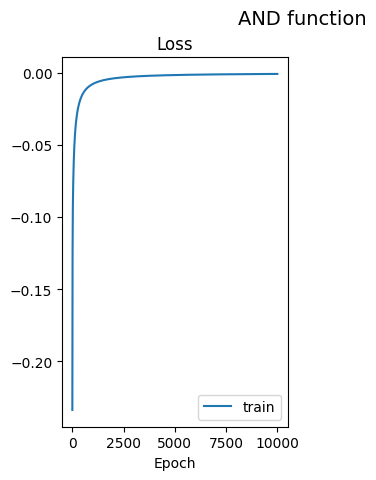

In [6]:
# 1.2.1

import numpy as np
from NeuralNetwork import Perceptron
from Functions import Sigmoid
import matplotlib.pyplot as plt 

def plot_history(res) -> None:
	plt.suptitle("AND function", fontsize=14)
	ax1 = plt.subplot(121)
	ax1.set_title("Loss")
	result_mapped = res
	ax1.plot(result_mapped, label="train")
	plt.xlabel("Epoch")
	ax1.legend()

# Initialize perperceptron
perceptron = Perceptron(np.array([0.01, -0.01],  dtype = 'f'), 0.02, Sigmoid)

# AND function
inputs = np.array([0, 0], dtype = 'f'), np.array([0, 1], dtype = 'f'), np.array([1, 0], dtype = 'f'), np.array([1, 1], dtype = 'f')
outputs = np.array([0, 0, 0, 1], dtype = 'f')

history = []
for i in range(10000):
    for j in range(4):
        perceptron.update(perceptron.compute_loss(perceptron.forward(inputs[j]), outputs[j]), 0.1)
    total_loss = 0
    for k in range(4):
        total_loss += perceptron.compute_loss(perceptron.forward(inputs[k]), outputs[k]) / 4
    history.append(total_loss)

for i in range(4):
    print(perceptron.forward(inputs[i]))

plot_history(history)

0.005055272495593401
0.9979798861340395
0.9979790861582227
0.9999999791730332


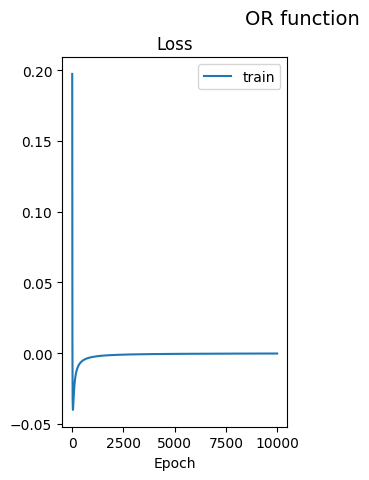

In [7]:
import numpy as np
from NeuralNetwork import Perceptron
from Functions import Sigmoid
import matplotlib.pyplot as plt 

def plot_history(res) -> None:
	plt.suptitle("OR function", fontsize=14)
	ax1 = plt.subplot(121)
	ax1.set_title("Loss")
	result_mapped = res
	ax1.plot(result_mapped, label="train")
	plt.xlabel("Epoch")
	ax1.legend()

# Initialize perperceptron
perceptron = Perceptron(np.array([0.01, -0.01],  dtype = 'f'), 0.02, Sigmoid)

# OR function
inputs = np.array([0, 0], dtype = 'f'), np.array([0, 1], dtype = 'f'), np.array([1, 0], dtype = 'f'), np.array([1, 1], dtype = 'f')
outputs = np.array([0, 1, 1, 1], dtype = 'f')

history = []
for i in range(10000):
    for j in range(4):
        perceptron.update(perceptron.compute_loss(perceptron.forward(inputs[j]), outputs[j]), 0.1)
    total_loss = 0
    for k in range(4):
        total_loss += perceptron.compute_loss(perceptron.forward(inputs[k]), outputs[k]) / 4
    history.append(total_loss)

for i in range(4):
    print(perceptron.forward(inputs[i]))

plot_history(history)

0.5128175942120714
0.4999999962518467
0.487182370375232
0.4743816069964846


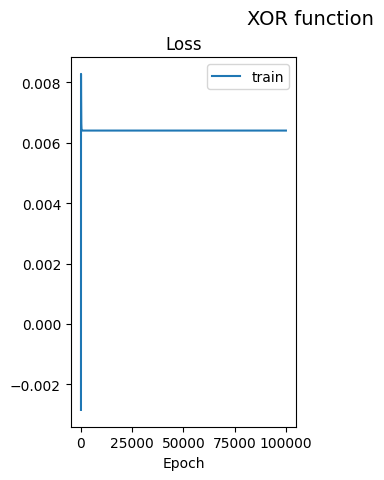

In [8]:
import numpy as np
from NeuralNetwork import Perceptron
from Functions import Sigmoid
import matplotlib.pyplot as plt 

def plot_history(res) -> None:
	plt.suptitle("XOR function", fontsize=14)
	ax1 = plt.subplot(121)
	ax1.set_title("Loss")
	result_mapped = res
	ax1.plot(result_mapped, label="train")
	plt.xlabel("Epoch")
	ax1.legend()

# Initialize perperceptron
perceptron = Perceptron(np.array([0.01, -0.01],  dtype = 'f'), 0.02, Sigmoid)

# XOR function
inputs = np.array([0, 0], dtype = 'f'), np.array([0, 1], dtype = 'f'), np.array([1, 0], dtype = 'f'), np.array([1, 1], dtype = 'f')
outputs = np.array([0, 1, 1, 0], dtype = 'f')

history = []
for i in range(100000):
    for j in range(4):
        perceptron.update(perceptron.compute_loss(perceptron.forward(inputs[j]), outputs[j]), 0.1)
    total_loss = 0
    for k in range(4):
        total_loss += perceptron.compute_loss(perceptron.forward(inputs[k]), outputs[k]) / 4
    history.append(total_loss)

for i in range(4):
    print(perceptron.forward(inputs[i]))

plot_history(history)

[1 2 2 1]


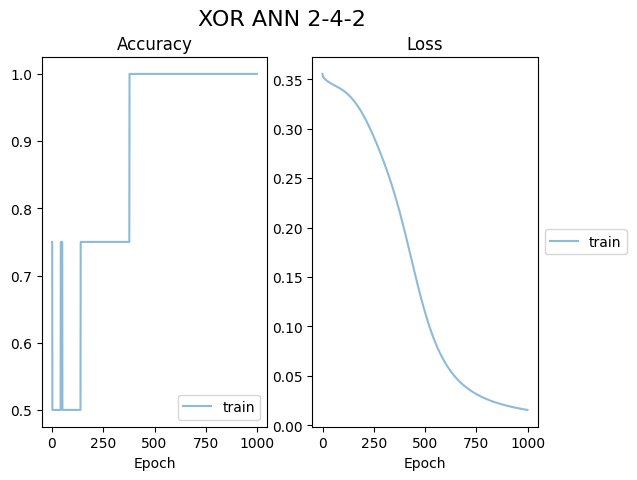

In [9]:
# XOR ANN
import numpy as np
from NeuralNetwork import Perceptron, ANN
import matplotlib.pyplot as plt 

def plot_history(res) -> None:
	plt.suptitle("XOR ANN 2-4-2", fontsize=16)
	ax1 = plt.subplot(121)
	ax1.set_title("Accuracy")
	val_acc_mapped = list(map(lambda x: x.val_acc, res))
	val_loss_mapped = list(map(lambda x: x.val_loss, res))
	loss_mapped = list(map(lambda x: x.loss, res))
	acc_mapped = list(map(lambda x: x.acc, res))
	ax1.plot(acc_mapped, label="train", alpha=0.5)
	plt.xlabel("Epoch")
	ax1.legend()

	ax2 = plt.subplot(122)
	ax2.set_title("Loss")
	ax2.plot(loss_mapped, label="train", alpha=0.5)
	plt.xlabel("Epoch")
	ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ann = ANN(2, [4, 2], 0.4)

inputs = np.array([np.array([0, 0], dtype = 'f'), np.array([0, 1], dtype = 'f'), np.array([1, 0], dtype = 'f'), np.array([1, 1], dtype = 'f')])
outputs = np.array([1, 2, 2, 1], dtype = 'f')

history = ann.fit(inputs, outputs, inputs, outputs, 2, 1000, 1000)

print(ann.predict(inputs))
plot_history(history)

[1 1 1 2]


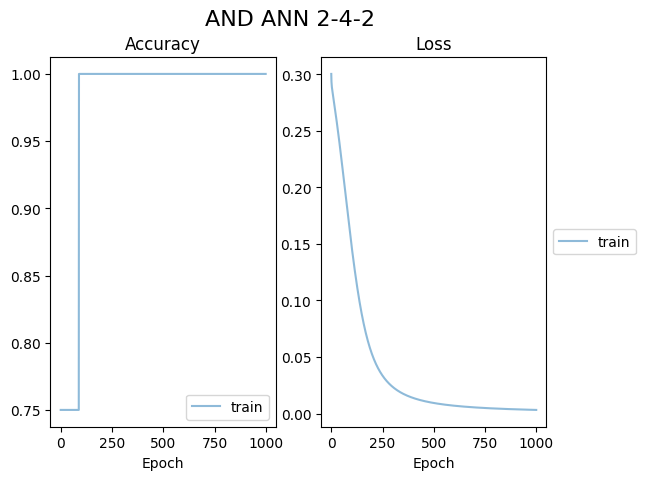

In [10]:
# AND ANN
import numpy as np
from NeuralNetwork import Perceptron, ANN

def plot_history(res) -> None:
	plt.suptitle("AND ANN 2-4-2", fontsize=16)
	ax1 = plt.subplot(121)
	ax1.set_title("Accuracy")
	val_acc_mapped = list(map(lambda x: x.val_acc, res))
	val_loss_mapped = list(map(lambda x: x.val_loss, res))
	loss_mapped = list(map(lambda x: x.loss, res))
	acc_mapped = list(map(lambda x: x.acc, res))
	ax1.plot(acc_mapped, label="train", alpha=0.5)
	plt.xlabel("Epoch")
	ax1.legend()

	ax2 = plt.subplot(122)
	ax2.set_title("Loss")
	ax2.plot(loss_mapped, label="train", alpha=0.5)
	plt.xlabel("Epoch")
	ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ann = ANN(2, [4, 2], 0.4)

inputs = np.array([np.array([0, 0], dtype = 'f'), np.array([0, 1], dtype = 'f'), np.array([1, 0], dtype = 'f'), np.array([1, 1], dtype = 'f')])
outputs = np.array([1, 1, 1, 2], dtype = 'f')

history = ann.fit(inputs, outputs, inputs, outputs, 2, 1000, 1000)

print(ann.predict(inputs))
plot_history(history)

[1 2 2 2]


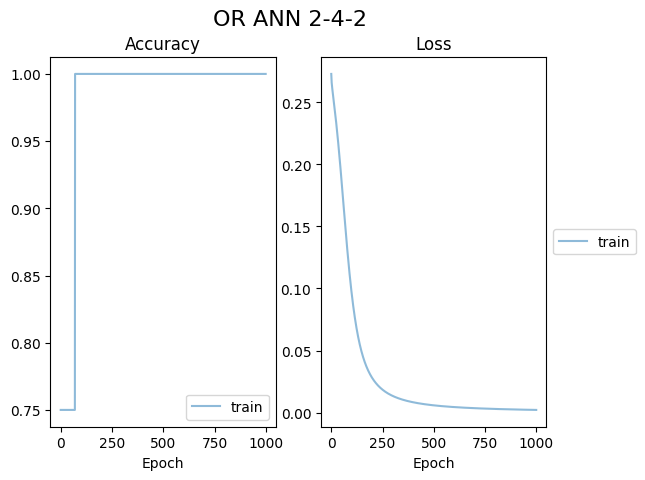

In [11]:
# OR ANN
import numpy as np
from NeuralNetwork import Perceptron, ANN

def plot_history(res) -> None:
	plt.suptitle("OR ANN 2-4-2", fontsize=16)
	ax1 = plt.subplot(121)
	ax1.set_title("Accuracy")
	val_acc_mapped = list(map(lambda x: x.val_acc, res))
	val_loss_mapped = list(map(lambda x: x.val_loss, res))
	loss_mapped = list(map(lambda x: x.loss, res))
	acc_mapped = list(map(lambda x: x.acc, res))
	ax1.plot(acc_mapped, label="train", alpha=0.5)
	plt.xlabel("Epoch")
	ax1.legend()

	ax2 = plt.subplot(122)
	ax2.set_title("Loss")
	ax2.plot(loss_mapped, label="train", alpha=0.5)
	plt.xlabel("Epoch")
	ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ann = ANN(2, [4, 2], 0.4)

inputs = np.array([np.array([0, 0], dtype = 'f'), np.array([0, 1], dtype = 'f'), np.array([1, 0], dtype = 'f'), np.array([1, 1], dtype = 'f')])
outputs = np.array([1, 2, 2, 2], dtype = 'f')

history = ann.fit(inputs, outputs, inputs, outputs, 2, 1000, 1000)

print(ann.predict(inputs))
plot_history(history)

In [16]:
# Code for 1.3.7, 1.3.8, 1.3.9
import numpy as np
from NeuralNetwork import ANN
from DataSplit import DataSet

epochs = [500, 1000]
learning_rates = [0.1, 0.01]
num_classes = 7
early_stop = 100
layers_struct = [
	[25, num_classes],
	[30, num_classes],
	[10, 15, num_classes]
]

def cv(epochs, learning_rate, layers_struct):
	ds = DataSet(0.1)
	k = 5
	splits = ds.split_for_cross(k)
	best_score = 0
	best_param = None
	for e in epochs:
		for lr in learning_rate:
			for ls in layers_struct:
				score = 0
				for train_set_f, train_set_t, val_set_f, val_set_t in splits:
					ann = ANN(train_set_f.shape[1], ls, learning_rate=lr)

					ann.fit(train_set_f, train_set_t, val_set_f, val_set_t, num_classes, e, early_stop)
					score += ann.predict_acc(val_set_f, val_set_t)
				score /= k
				if score > best_score:
					best_score = score
					best_param = {"lr" : lr, "ls" : ls, "epochs" : e}
	print("Best paramaters",best_param)
	print("Score during cross-validation", best_score)

	ann = ANN(ds.train_features.shape[1], best_param["ls"], learning_rate=best_param["lr"])
	ann.fit(ds.train_features, ds.train_targets, ds.test_features, ds.test_targets, num_classes, best_param["epochs"], early_stop)
	print("Score on test set", ann.predict_acc(ds.test_features, ds.test_targets))
	return best_param

cv(epochs, learning_rates, layers_struct)
    

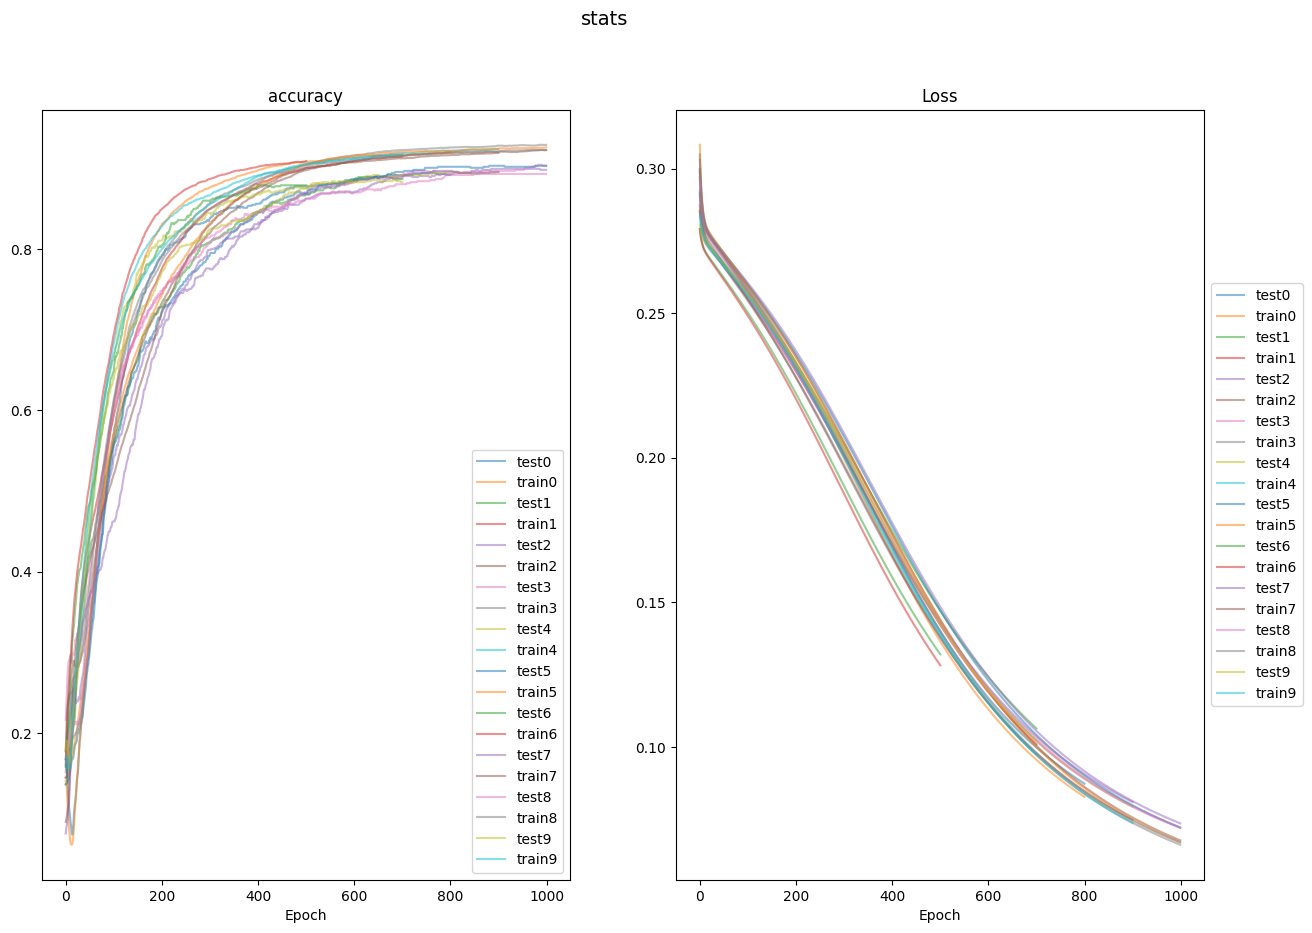

In [13]:
# 1.3.10 and 1.4.12
import numpy as np
from NeuralNetwork import ANN
from DataSplit import DataSet
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

def plot_history(res, number) -> None:
	plt.suptitle("stats", fontsize=14)
	ax1 = plt.subplot(121)
	ax1.set_title("accuracy")
	val_acc_mapped = list(map(lambda x: x.val_acc, res))
	val_loss_mapped = list(map(lambda x: x.val_loss, res))
	loss_mapped = list(map(lambda x: x.loss, res))
	acc_mapped = list(map(lambda x: x.acc, res))
	ax1.plot(val_acc_mapped, label="test" + str(number), alpha=0.5)
	ax1.plot(acc_mapped, label="train" + str(number), alpha=0.5)
	plt.xlabel("Epoch")
	ax1.legend()

	ax2 = plt.subplot(122)
	ax2.set_title("Loss")
	ax2.plot(val_loss_mapped, label="test" + str(number), alpha=0.5)
	ax2.plot(loss_mapped, label="train" + str(number), alpha=0.5)
	plt.xlabel("Epoch")
	ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ds = DataSet(0.1)
best_param = {'lr': 0.1, 'ls': [25, 7], 'epochs': 1000}
early_stop = 100
num_classes = 7

total_history = []
for i in range(10):
	ann = ANN(ds.train_features.shape[1], best_param["ls"], learning_rate=best_param["lr"])
	history = ann.fit(ds.train_features, ds.train_targets, ds.test_features, ds.test_targets, num_classes, best_param["epochs"], early_stop)
	total_history.append(history)

for i in range(10):
	plot_history(total_history[i], i)


{7: [0.8638676844783715, 0.8244274809160306, 0.8676844783715013, 0.8804071246819338, 0.8676844783715013, 0.8944020356234097, 0.8460559796437659, 0.8880407124681934, 0.7888040712468194, 0.8740458015267175], 15: [0.9122137404580153, 0.9236641221374046, 0.9274809160305344, 0.9274809160305344, 0.9122137404580153, 0.9198473282442748, 0.9274809160305344, 0.916030534351145, 0.916030534351145, 0.8982188295165394], 25: [0.926208651399491, 0.9363867684478372, 0.9312977099236641, 0.9173027989821882, 0.9287531806615776, 0.9338422391857506, 0.9249363867684478, 0.9351145038167938, 0.9312977099236641, 0.9325699745547074], 30: [0.9427480916030534, 0.9325699745547074, 0.9338422391857506, 0.9274809160305344, 0.9402035623409669, 0.9351145038167938, 0.9351145038167938, 0.9363867684478372, 0.9325699745547074, 0.9363867684478372]}


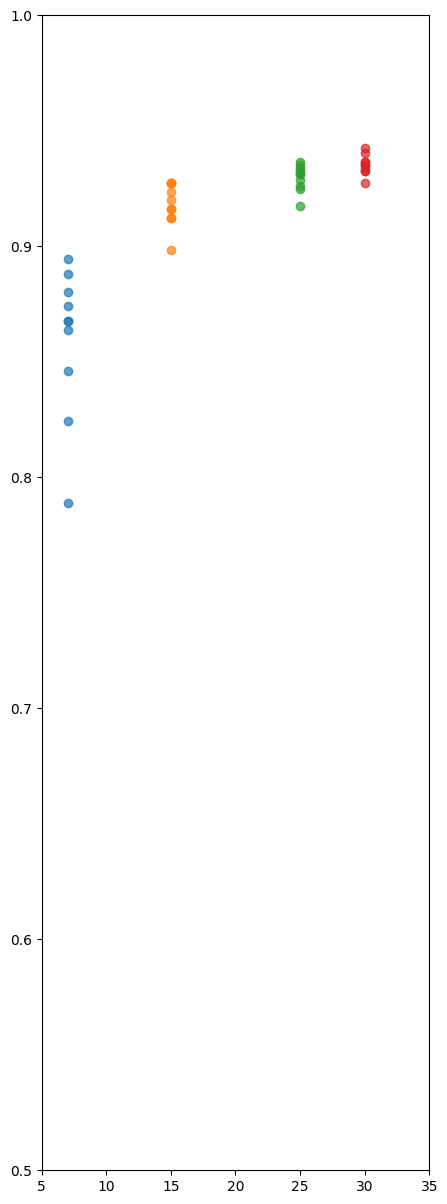

In [14]:
# 1.4.11
import numpy as np
from NeuralNetwork import ANN
from DataSplit import DataSet
import matplotlib.pyplot as plt

layer_structures = [
	[7, 7],
	[15, 7],
	[25, 7],
	[30, 7],
]

ds = DataSet(0.1)
best_param = {'lr': 0.1, 'epochs': 1000}
early_stop = 100
num_classes = 7

total_history = {}
for ls in layer_structures:
	for i in range(10):
		ann = ANN(ds.train_features.shape[1], ls, learning_rate=best_param["lr"])
		ann.fit(ds.train_features, ds.train_targets, ds.test_features, ds.test_targets, num_classes, best_param["epochs"], early_stop)
		if ls[0] not in total_history:
			total_history[ls[0]] = []
		total_history[ls[0]].append(ann.predict_acc(ds.test_features, ds.test_targets))
	
print(total_history)

plt.figure(figsize=(5,15))
plt.xlim((5, 35))
plt.ylim((0.5, 1))
for key in total_history:
	plt.scatter(np.repeat([key], len(total_history[key])), total_history[key], label=key, alpha = 0.7)



0.9223918575063613
[[108   0   4   1   1   1   1]
 [  0  98   3   0   2   2   3]
 [  1   4 106   0   0   0   2]
 [  3   0   0 113   1   1   5]
 [  0   0   4   0  81   2   0]
 [  0   1   0   0   5 119   2]
 [  0   3   1   7   0   1 100]]


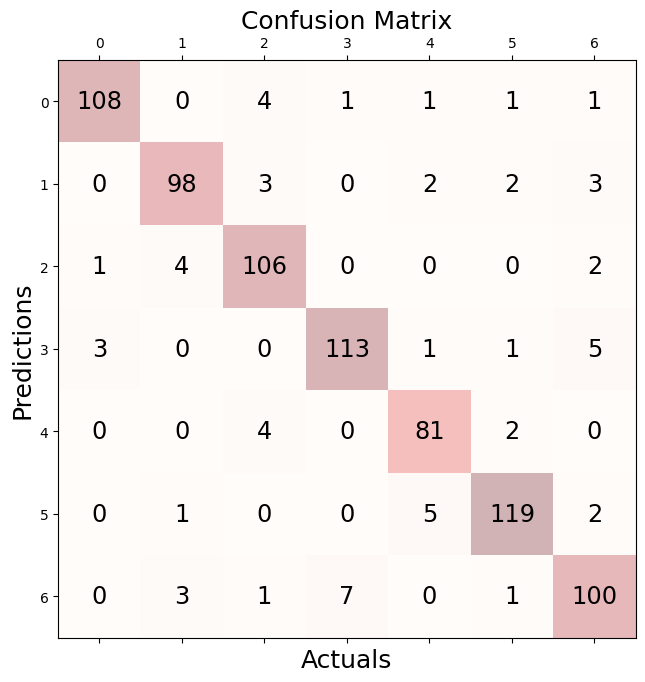

In [15]:
# 1.5
import numpy as np
from NeuralNetwork import ANN
from DataSplit import DataSet
import matplotlib.pyplot as plt

ds = DataSet(0.1)
best_param = {'lr': 0.1, 'ls': [25, 7], 'epochs': 1000}
early_stop = 100
num_classes = 7

ann = ANN(ds.train_features.shape[1], best_param["ls"], learning_rate=best_param["lr"])
ann.fit(ds.train_features, ds.train_targets, ds.test_features, ds.test_targets, num_classes, best_param["epochs"], early_stop)

print(ann.predict_acc(ds.test_features, ds.test_targets))
conf_matrix = np.asarray(ann.confusion_matrix(ds.test_features, ds.test_targets, num_classes))
print(conf_matrix)
	
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()